In [6]:
from IPython.display import display, Math, Latex
import pystan
import matplotlib.pyplot as plt
import numpy as np

![](./assets/DJlogo_alpha.png?raw=true)<!-- .element height="80%" width="80%" -->

<http://www.DataJavelin.com>
## Dr Peter Hurley

<h1> What is Probability? </h1>
<br >

<h2> Idea: Probability is the Long Run Expected Number of Occurances of an Event </h2>  
<br />
<br />
   
<p> When you roll a fair dice once it will come up with only one answer, but after doing this many times each outcome will occur 1/6 of the time. So the probability of an outcome is 1/6. </p>
<br />
<p> Another way of saying this: The probability of an event A is equal to the number of ways in which A can occur divided by the number of ways in which any event can happen. </p>   
<br />  
<p> This then helps us answer questions such as, what is the probability of drawing three aces in a row from a shuffled deck of cards? </p> 
<br />  
<p> There are four ways of picking the first ace, out of 52 possible outcomes, three ways of picking the first ace, out of 51 possible outcomes, and two ways of picking the first ace, out of 50 possible outcomes. Therefore:  </p> 


\begin{equation}
P(3\ Aces) = \frac{4}{52} * \frac{3}{51} * \frac{2}{50} 
\end{equation}

## ***QUESTION***
<p> We can also ask more nuanced questions, such as what is the probability of event A given event B. For example, what is the probability of a card is a King given it is a face card? <p>
<br >


\begin{equation}
P(A\ |\ B) =  \frac{P(A \cap	B)}{P(B)}
\end{equation}



## ***QUESTION***
<p> Suppose a family has two children and suppose one of the children is a boy. What is the probability that both children are boys? <p>
   

## ***QUESTION***

The Monte Hall Problem:
    
Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?


<p> We can manipulate these equations as in other areas of maths as we did above <p>
<br >

\begin{equation}
P(A\ |\ B) =  \frac{P(A \cap	B)}{P(B)}
\end{equation}

\begin{equation}
P(A \cap	B) = P(A) * P(B | A)
\end{equation}

\begin{equation}
P(A \cap	B) = P(B) * P(A | B)
\end{equation}

\begin{equation}
P(A) * P(B | A) = P(B) * P(A | B)
\end{equation}

\begin{equation}
P(B | A) = \frac{P(B) * P(A | B)}{P(A)}
\end{equation}

<p> This last equation is Bayes Theorem, a source of heated debate among statisticians throughout the 20th century. </p>

<br >

<p> You may wonder what the fuss is as surely everyone accepts the above? </p>

<br > 

<p> The issue comes in when we consider how far we can apply this equation. </p>

## Probabilistic models 
* A model describes data that one could observe from a system
* Uses probability theory to express all forms of uncertainty and noise associated with our model
* Inverse probability (i.e. Bayes rule) to infer parameters, adapt models, make predictions and learn from data.


<br >

A good example of how Bayesian probability is more intuitive is to think of a situation such as the probability of rain, given the sky is cloudy, or that there is a sprinkler nearby. We use prior information to decide if it has rained, rather than just looking at the number of times it has rained in past.

<br > 

Alternatively there can also be cases where a frequentist model breaks down. Suppose you are an astronomer looking at Saturn with an old telescope. Combining many measurements of the shape of the planet will not improve your result on resolving the shape. However given a model of how a planet with a ring or without you can test how well each model describes Saturn and infer the correct shape. 

<br>

Other key cases are those in which you can never repeat the experiment, e.g. modelling how the universe grew since the big bang or the diversification of songbirds in the Andes. 



\begin{equation}
P(B | A) = \frac{P(B) * P(A | B)}{P(A)}
\end{equation}

$P(B | A)$ = Posterior

$P(B)$ = Prior

$P(A | B)$ = Likelihood

$P(A)$ = Marginal Likelihood


<br> 

<p> Transparent way of including model prior information <br > 
Gives full probability distribution
</p>
<br >

<p> As the area under a posterior must equal one the marginal likelihood can be thought of as a normalistion value, and so the equation is often written as: </p>

<br >

\begin{equation}
P(B | A) \propto P(B) * P(A | B)
\end{equation}

<br >

<p> In that case your posterior is your prior state of belief being updated by the new data. </p>

<br > 

P(A) is actually an integral which is often difficult to solve, and must be done numerically,  motivates the need for MCMC type sampling. MCMC-like algorithms will generate points proportionally to the posterior values in each region. A simplistic way of thinking about this is a sampler generates some initial starting parameter values, calculates how well a model with these parameters explains the data and then generates a new set of parameter values nearby. If these new values are an improvement we always accept the new point and move there, otherwise we have a small chance we move there. The exact way in which this works varies by method.



<p> So far so good, but there is a lot of debate and discomfort with how you choose an appropriate prior. However disagreements over what prior is used can at least be transparent, and the correct description of the current state of knowledge before new data is an important and necessary part of debate. </p>

### Why bother with all this Bayesian probabilistic stuff?
* Prior information help us extract more information from data

### Prob. model of straight line
$\mathbf{y}=m\mathbf{x}+c + \epsilon$

likelihood = $p(\mathbf{y}|m,c,\mathbf{x}) = \mathcal{N}(m\mathbf{x}+c,\sigma^2)$

prior = $p(m,c) = \mathcal{N}(0,\Sigma_p)$

posterior (after a bit of maths)

$p(m,c|\mathbf{y},\mathbf{x}) \propto  \mathcal{N}(\sigma^{-2}(\sigma^{-2}\mathbf{x}\mathbf{x}^T + \Sigma_{p}^{-1})^{-1}\mathbf{x}\mathbf{y},$
$\sigma^{-2}\mathbf{x}\mathbf{x}^T + \Sigma_{p}^{-1})$

Simple example straight line, error only in y, simple gaussian prior

What happens if intercept is positive? gets complicated fast

![](./assets/line_1.png?raw=true)


![](./assets/line_2.png?raw=true)


Have prior information on intercept

$c \sim \mathcal{N}(0.3,0.1)$

![](./assets/line_3.png?raw=true)


![](./assets/line_4.png?raw=true)




* The uncertainty in our inferred model parameters contains information.

* We do not want to just know the best answer, we
want to know how uncertain we are.



<img src="./assets/max_like.png" alt="Drawing" style="width: 600px;"/>

<img src="./assets/max_like_2.png" alt="Drawing" style="width: 600px;"/>

<img src="./assets/curved_posterior.png" alt="Drawing" style="width: 600px;"/>

<img src="./assets/curved_posterior_probx.png" alt="Drawing" style="width: 600px;"/>

<img src="./assets/curved_posterior_proby.png" alt="Drawing" style="width: 600px;"/>



### The mode is an inappropriate measure of Probability mass for High D!!!

Think about mass $m$ and density $\rho$

$$
m=\int \rho dV
$$

Probability works in a similar way:

$$
\mathbb{E}_{\pi}[f]=\int_{Q}\pi(q)f(q)dq
$$

To compute expectations efficiently with MCMC, we want to spend time in areas of the posterior that will contribute most to the expectation.

There is a balance between density and volume.. but how does volume change with number of dimensions??

### 1D

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


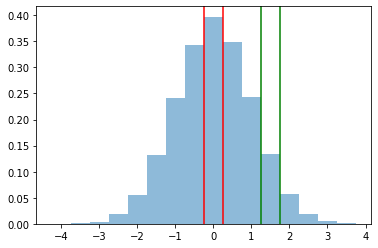

In [34]:
plt.hist(np.random.normal(0,1,50000),bins=np.arange(-4.25,4.25,0.5),normed=True,alpha=0.5);
plt.axvline(x=-0.25,c='r')
plt.axvline(x=0.25,c='r')

plt.axvline(x=1.25,c='g')
plt.axvline(x=1.75,c='g')

Where is most of the mass?

Centre (red): $0.4 \times 0.5 = 0.2$

Edge (green): $0.13 \times 0.5 = 0.065$

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  


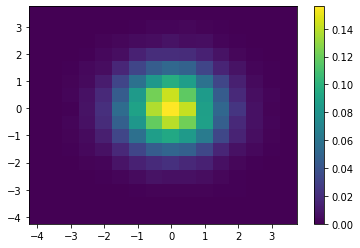

In [44]:
points=np.random.multivariate_normal([0,0],[[1,0],[0,1]],50000)
plt.hist2d(points[:,0],points[:,1],bins=np.arange(-4.25,4.25,0.5),normed=True);
plt.colorbar()

Where is most of the mass?

Centre (red):  $0.15×0.5^2=0.0375$

Edge (green):  $\approx 0.08 \times 0.5^2 \times 16=0.32$

To identify the regions of parameter space that dominate expectations we should instead consider the product of density and volume. In high dimensions, the volume behaves very differently from the density, resulting in a tension that pushes the important regions of parameter space away from the mode further out towards the tails of the distribution into a region known as the **typical set**. The move to a thin shell with higher dimensions is called the **concentration of measure**.

For more info, see this [blog post](https://mc-stan.org/users/documentation/case-studies/curse-dims.html)

### Using Uncertianty in decision making means making better decisions

* Business consider risk when making decisions
* Uncertianty should be considered when making decisions based on predictions

See [Blog post on Bayesian Decision making](https://pdh21.github.io/jekyll/update/2019/06/06/FACYNation_BDT.html)



## Calculating the Posterior
* Analytical approximation (often impossible)
* Grid approximation (not efficient)
* Quadratic approximation (limited)
* Markov chain Monte Carlo (intensive)

### [Comparing other MCMC techniques](https://chi-feng.github.io/mcmc-demo/app.html?algorithm=NaiveNUTS&target=banana)
e.g. 
* Metropolis Hastings
* Gibbs
* Standard NUTS
* Nested Sampling


<br >

## Probabilistic Programming
*Define probability models & solve automatically*

<img src="./assets/probprog.png" alt="Drawing" style="width: 600px;"/>

[Good blog post on philosophy of Probabilistic Programming](https://www.oreilly.com/content/probabilistic-programming/)

# Stan 
<img src="http://mc-stan.org/images/stan_logo.png" alt="Drawing" style="width: 100px;"/>


* Language for building probabilistic models
* Algorithms for fitting probabilistic models
* Interfaces for using probabilistic models 



### Other PPLs:
* [Tensorflow probability](https://www.tensorflow.org/probability), formally Edward
* [PyMC3 (soon PyMC4)](https://docs.pymc.io/)
* [Pyro](http://docs.pyro.ai/en/stable/)

## Language
Specify probabilisitic model: the joint probability distribution function,

$$p(\theta,x)$$

* $\theta$ = parameters
* $x$ = data
* $p$ = model


Stan is a language:
* Statically typed, imperative
* User can define programs using parameters, data and  $\log p(\theta,x)$
* Any program can be written as long as $\log p(\theta,x)$ is differentiable


Statically typed like C, C++. i.e. types declared at compile time rather than run time like Python.

Imperative, you tell the compiler what you want to happen, step by step



## Algorithms
* Bayesian Inference: No U-Turn Hamiltonian Monte Carlo,
    - $p(\theta|x)$ approximated with $[\theta^1,\theta^2,..\theta^N]$
* Approximate Bayesian Inference: Variational Inference,
    - $\hat{p}(\theta|x) \approx q(\hat{\phi})$, where $\phi = argmin_{\phi} D_{KL}(q(\theta|\phi)||p(\theta,x))$
* Optimisation: Max 
    - $\hat{\theta} = argmax_{\theta} p(\theta,x)$
    


### The advantages of Stan and HMC

* Uses gradient to traverse posterior more efficiently
* It knows when there is a problem
* Stan automatically tunes the parameters of HMC


## Interfaces
* CmdStan,PyStan,RStan
* C++ API
* C++ auto-diff library
* Software built with Stan: RStanArm, brms, prophet

## Writing a model in Stan
* A Stan program is organized into a sequence of named blocks


In [ ]:
example_model="""functions {
// ... function declarations and definitions ...
}
data {
// ... declarations ...
}
transformed data {
// ... declarations ... statements ...
}
parameters {
// ... declarations ...
} 
transformed parameters {
// ... declarations ... statements ...}
model {
// ... declarations ... statements ...
}
generated quantities {
// ... declarations ... statements ...
}
"""

### Other things to note:
* Add comments with `\\`
* Sampling statements with `~`
* Can print output with `print()`
* `;` at end of each line


Documentation for Stan: https://mc-stan.org/docs/2_23/stan-users-guide/index.html


<p> As an example lets consider a question of if a coin is fair or not. We begin with a flat prior and update it as we flip a coin. <p>





In [14]:
coin_model ="""// Inferring a Rate
data { 
  int<lower=1> n; 
  int<lower=0> h;
  real<lower=0.0,upper=1.0> mu;
  real<lower=0.0,upper=10> sig;
} 
parameters {
  real<lower=0,upper=1> theta;
} 
model {
  // Prior Distribution for Rate Theta
  theta ~ normal(mu, sig);
  
  // Observed Counts
  h ~ binomial(n, theta);
}"""

sm=pystan.StanModel(model_code=coin_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_78d0d6b6c8de42c1347d66aa8351d4cc NOW.


In [11]:
model_data={
        'n':100,
        'h':50,
        'mu':0.5,
        'sig':0.5
}


In [12]:
fit=sm.sampling(data=model_data,chains=4,iter=1000,seed=12329)

Inference for Stan model: anon_model_f5e1c19b675a739c99f9dc1c95646755.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.53  2.1e-3   0.05   0.43   0.49   0.53   0.56   0.63    553    1.0
lp__   -83.6    0.02   0.74 -85.72 -83.76 -83.31 -83.13 -83.08    925    1.0

Samples were drawn using NUTS at Tue Jul 28 16:12:53 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


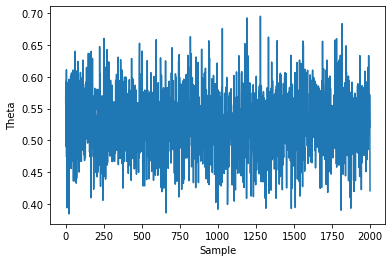

<function matplotlib.pyplot.show(*args, **kw)>

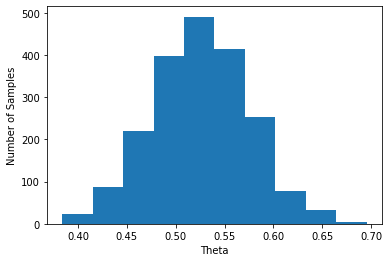

In [13]:
print(fit)

plt.plot(np.arange(0, fit['theta'].size), fit['theta'])
plt.xlabel('Sample')
plt.ylabel('Theta')
plt.show()

plt.hist(fit['theta'])
plt.xlabel('Theta')
plt.ylabel('Number of Samples')
plt.show

Inference for Stan model: anon_model_b8b89c3550faa3c1ec5a2fff83579316.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.67  4.5e-3   0.13   0.39   0.58   0.67   0.76   0.89    820    1.0
lp__   -8.15    0.03   0.73 -10.06  -8.31  -7.88  -7.69  -7.64    528   1.01

Samples were drawn using NUTS at Tue Feb 25 10:35:00 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


<function matplotlib.pyplot.show(*args, **kw)>

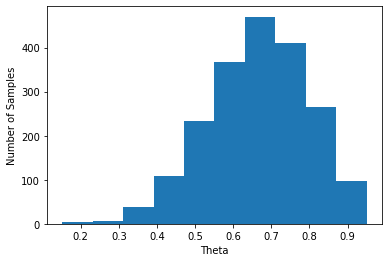

In [13]:
model_data={
        'n':10,
        'h':7,
        'mu':0.5,
        'sig':0.5
}

fit=sm.sampling(data=model_data,chains=4,iter=1000,seed=12329)

print(fit)

plt.hist(fit['theta'])
plt.xlabel('Theta')
plt.ylabel('Number of Samples')
plt.show

### Exercise:
Using Python, generate some fake data for a coin tosses (i.e. ten flips) and fit the Stan model to sequential number of tosses and plot the results to see how the posterior changes as a function of the number of tosses.

### The double coin toss game

<p> Sometimes our data may come in a more complex form. For instance imagine if you have a game that involves coin tosses. You flip a coin until you flip a heads and a tails in a row. Your opponent flips a coin until they flip two heads in a row. All the information you have is who won each game. From this you want to understand if one coin was biased or not. </p>

<p> As HT and HH in two coin flips are equally likely we may run the code above and see how close our theta value is to 0.5 <p>
    
<p> After 2,000 flips your opponent has won 747 times but you have won 1,253. </p>
    
    

Inference for Stan model: anon_model_b8b89c3550faa3c1ec5a2fff83579316.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta   0.37  4.1e-4   0.01   0.35   0.37   0.37   0.38   0.39    688   1.01
lp__   -1323    0.02   0.71  -1325  -1323  -1323  -1323  -1323    977    1.0

Samples were drawn using NUTS at Mon Feb 24 23:20:50 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


<function matplotlib.pyplot.show(*args, **kw)>

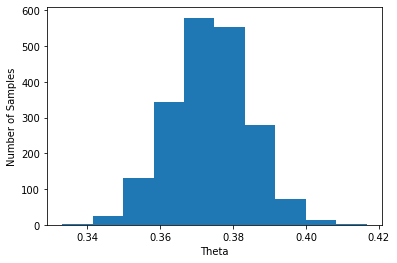

In [8]:
model_data={
        'n':2000,
        'h':747,
}

fit=sm.sampling(data=model_data,chains=4,iter=1000,seed=12329)

print(fit)

plt.hist(fit['theta'])
plt.xlabel('Theta')
plt.ylabel('Number of Samples')
plt.show

<p> So can we conclusively say that our coin was biased? <p>
    
<p> Once again this is a case where we should have questioned our underlying assumptions, i.e. that both opponents had a 50% chance of winning. In future this will be covered in part by prior predictive checks which should give us intuition on how our model behaves. For now let us first generate data in the way described assuming both players have a fair coin </p>

In [14]:
bob_wins = 0
alice_wins = 0

for i in range(2000):
    bob_seq = np.array([])
    alice_seq = np.array([])
    bob_poss_win = 0
    alice_poss_win = 0
    while bob_wins + alice_wins < 2000:
        bob_seq = np.append(bob_seq, np.random.randint(2,size=1))
        alice_seq = np.append(alice_seq, np.random.randint(2,size=1))
        if np.prod((bob_seq.size > 1) and (bob_seq[-2:] == [0,0])):
            bob_poss_win = 1
        if np.prod((alice_seq.size > 1) and (alice_seq[-2:] == [0,1])):
            alice_poss_win = 1
        if (bob_poss_win == 1) and (alice_poss_win == 1):
            bob_seq = np.array([])
            alice_seq = np.array([])
            bob_poss_win = 0
            alice_poss_win = 0
        elif bob_poss_win == 1:
            bob_wins += 1 
            bob_seq = np.array([])
            alice_seq = np.array([])
            bob_poss_win = 0
        elif alice_poss_win == 1:
            alice_wins += 1 
            bob_seq = np.array([])
            alice_seq = np.array([])
            alice_poss_win = 0
            
print(bob_wins)
print(alice_wins)


752
1248


<p> Understanding a problem deeply is important when building a model. Misunderstanding a model can lead to misinterpretation. In this case there is a subtle difference, if you need to flip HT and first flip a H you will not win if on the next coin toss you flip another H - but you are still only one flip away. If you need to flip HH and after one H toss flip a T, you are again two flips away from winning. </p>



## Exercise:
Create some fake data by sampling from a normal distribution with a known mean and standard deviation.

Build a Stan model that fits that data and estimates the mean and standard deviation.

* What did you choose as a prior?
* How did it affect your posterior?

### Exercise:
* Create some fake data for a linear regression model (i.e. $y=mx +c$)

* Build a Stan model to fit the data

* Look at results, compare posterior for slope and intercept

### So far:
* Introduced Probability theory
* Provided motivation as to we want to use for science and machine learning
* Stan is a PPL that we can use to build probabilisitic models
* Can build some simple Stan models